# AirBnb - Analyse Prix

## Y a t'il des quartiers sur-cotés?

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


## Constitution du set de données


In [2]:
#constitution d'un DataFrame 
#à partir du fichier des offres de logements AirBnb sur Paris (nombre de colonnes réduit)

abdf = pd.read_csv('listings.csv', index_col= "id")

In [3]:
abdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64293 entries, 3109 to 36561242
Data columns (total 15 columns):
name                              64224 non-null object
host_id                           64293 non-null int64
host_name                         64229 non-null object
neighbourhood_group               0 non-null float64
neighbourhood                     64293 non-null object
latitude                          64293 non-null float64
longitude                         64293 non-null float64
room_type                         64293 non-null object
price                             64293 non-null int64
minimum_nights                    64293 non-null int64
number_of_reviews                 64293 non-null int64
last_review                       49684 non-null object
reviews_per_month                 49684 non-null float64
calculated_host_listings_count    64293 non-null int64
availability_365                  64293 non-null int64
dtypes: float64(4), int64(6), object(5)
memory usag

In [4]:
#analyse de la proportion de valeurs nulles
round(abdf.isna().sum()/len(abdf)*100, 2)

name                                0.11
host_id                             0.00
host_name                           0.10
neighbourhood_group               100.00
neighbourhood                       0.00
latitude                            0.00
longitude                           0.00
room_type                           0.00
price                               0.00
minimum_nights                      0.00
number_of_reviews                   0.00
last_review                        22.72
reviews_per_month                  22.72
calculated_host_listings_count      0.00
availability_365                    0.00
dtype: float64

In [5]:
#constitution d'un DataFrame
#à partir du fichier complet des offres de logements AirBnb sur Paris (listings.csv.gz)
#utilisation du DataFrame df avec uniquement 20% des observations

abdf2 = pd.read_csv('listings_1.csv', index_col= "id", low_memory=False)
df = abdf2.sample(frac=0.2)

In [6]:
for colo in df.columns:
    print(colo)

listing_url
scrape_id
last_scraped
name
summary
space
description
experiences_offered
neighborhood_overview
notes
transit
access
interaction
house_rules
thumbnail_url
medium_url
picture_url
xl_picture_url
host_id
host_url
host_name
host_since
host_location
host_about
host_response_time
host_response_rate
host_acceptance_rate
host_is_superhost
host_thumbnail_url
host_picture_url
host_neighbourhood
host_listings_count
host_total_listings_count
host_verifications
host_has_profile_pic
host_identity_verified
street
neighbourhood
neighbourhood_cleansed
neighbourhood_group_cleansed
city
state
zipcode
market
smart_location
country_code
country
latitude
longitude
is_location_exact
property_type
room_type
accommodates
bathrooms
bedrooms
beds
bed_type
amenities
square_feet
price
weekly_price
monthly_price
security_deposit
cleaning_fee
guests_included
extra_people
minimum_nights
maximum_nights
minimum_minimum_nights
maximum_minimum_nights
minimum_maximum_nights
maximum_maximum_nights
minimum_night

In [7]:
df.head(5)


,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
22730891,https://www.airbnb.com/rooms/22730891,20190709213457,2019-07-11,Charming flat Trocadero / Eiffel-Tower 1bd/4p,Nice and quiet one bedroom apartment with two ...,The accommodation is located 5-10 minutes walk...,Nice and quiet one bedroom apartment with two ...,none,The apartment is located in the 16th borough o...,NaN,...,t,f,moderate,f,f,1,1,0,0,1.98
8201593,https://www.airbnb.com/rooms/8201593,20190709213457,2019-07-10,Charmant 2P Paris Centre 44m2,Bel appartement de 2 pièce (44m2) au 4ème étag...,"Situé dans le 12ème arrondissement de Paris, à...",Bel appartement de 2 pièce (44m2) au 4ème étag...,none,NaN,NaN,...,t,f,strict_14_with_grace_period,f,f,1,1,0,0,0.04
5430010,https://www.airbnb.com/rooms/5430010,20190709213457,2019-07-10,Paris métro porte versailles,2 pièces tout équipé pour 4 personnes avec p...,DISPONIBLE DU 24/4/2015 AU 1/05/2015,2 pièces tout équipé pour 4 personnes avec p...,none,NaN,NaN,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,NaN
30673444,https://www.airbnb.com/rooms/30673444,20190709213457,2019-07-10,Two pièce Parisian Appartement,40 square meter appartement in the center of P...,NaN,40 square meter appartement in the center of P...,none,"Walking distance to the Seine river, the Musée...",NaN,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.73
13841586,https://www.airbnb.com/rooms/13841586,20190709213457,2019-07-10,Cozy 2rooms ap close to Montmartre & Sacre Coeur!,If you are looking for a lovely place that is ...,"2 rooms flat 5 minutes walk from Montmartre, w...",If you are looking for a lovely place that is ...,none,"Close to Sacré Coeur, Montmartre, Marché des B...",Normal check-in and check-out times: Check-out...,...,t,f,moderate,f,f,1,1,0,0,NaN


In [8]:
df.price.describe()
# price a le dtype: object, ce qui n'était pas le cas dans le fichier listings.csv

count      12859
unique       422
top       $80.00
freq         673
Name: price, dtype: object

In [9]:
#selection des colonnes souhaitées parmi les 105 
#et merge avec le df issu de listings.csv pour garder le prix en dtype int64

target_columns = ["square_feet", "summary", "space", "description", "experiences_offered", "neighborhood_overview", "notes","property_type", "accommodates", "first_review", "review_scores_value", "review_scores_cleanliness", "review_scores_location", "review_scores_accuracy", "review_scores_communication", "review_scores_checkin", "review_scores_rating", "maximum_nights", "listing_url", "host_is_superhost", "host_about", "host_response_time", "host_response_rate", "street", "weekly_price", "monthly_price", "market"]
listings = pd.merge(abdf, df[target_columns], on='id', how='left')
listings.describe()

,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,square_feet,accommodates,review_scores_value,review_scores_cleanliness,review_scores_location,review_scores_accuracy,review_scores_communication,review_scores_checkin,review_scores_rating,maximum_nights
count,6.429300e+04,0.0,64293.000000,64293.000000,64293.000000,64293.000000,64293.000000,49684.000000,64293.000000,64293.000000,232.000000,12859.000000,9704.000000,9713.000000,9704.000000,9710.000000,9711.000000,9705.000000,9719.000000,12859.000000
mean,6.648611e+07,NaN,48.864109,2.345350,116.763925,5.529342,18.749195,1.210193,7.814210,83.641314,416.172414,3.041294,9.284007,9.230516,9.650350,9.606797,9.720008,9.688923,93.127997,698.967805
std,7.693518e+07,NaN,0.018483,0.033776,164.316690,47.874056,38.751261,1.459079,35.337494,118.039870,391.851201,1.536993,0.876437,1.030970,0.696322,0.784726,0.723143,0.744162,8.148579,684.386666
min,2.419000e+03,NaN,48.812890,2.219430,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,20.000000,1.000000
25%,1.080773e+07,NaN,48.850670,2.323950,60.000000,2.000000,1.000000,0.230000,1.000000,0.000000,0.000000,2.000000,9.000000,9.000000,9.000000,9.000000,10.000000,10.000000,90.000000,30.000000
50%,3.266216e+07,NaN,48.865260,2.348330,80.000000,2.000000,5.000000,0.700000,1.000000,15.000000,377.000000,2.000000,9.000000,9.000000,10.000000,10.000000,10.000000,10.000000,95.000000,1125.000000
75%,9.359166e+07,NaN,48.879230,2.370900,120.000000,4.000000,19.000000,1.640000,1.000000,155.000000,628.000000,4.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,99.000000,1125.000000
max,2.748233e+08,NaN,48.905210,2.471890,9379.000000,9999.000000,809.000000,31.150000,323.000000,365.000000,1668.000000,16.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,100.000000,50000.000000


In [10]:
result = round (listings.isna().sum()/len(listings)*100, 2)
print(result)

#listings_cols_na = listings.isnull().sum()[listings.isnull().sum() > 0]

name                                0.11
host_id                             0.00
host_name                           0.10
neighbourhood_group               100.00
neighbourhood                       0.00
latitude                            0.00
longitude                           0.00
room_type                           0.00
price                               0.00
minimum_nights                      0.00
number_of_reviews                   0.00
last_review                        22.72
reviews_per_month                  22.72
calculated_host_listings_count      0.00
availability_365                    0.00
square_feet                        99.64
summary                            80.90
space                              86.19
description                        80.26
experiences_offered                80.00
neighborhood_overview              87.50
notes                              93.93
property_type                      80.00
accommodates                       80.00
first_review    

# Focus sur les prix, la 1ere étape: nettoyage



In [11]:
listings.price.describe()
#max à 9379€!

count    64293.000000
mean       116.763925
std        164.316690
min          0.000000
25%         60.000000
50%         80.000000
75%        120.000000
max       9379.000000
Name: price, dtype: float64

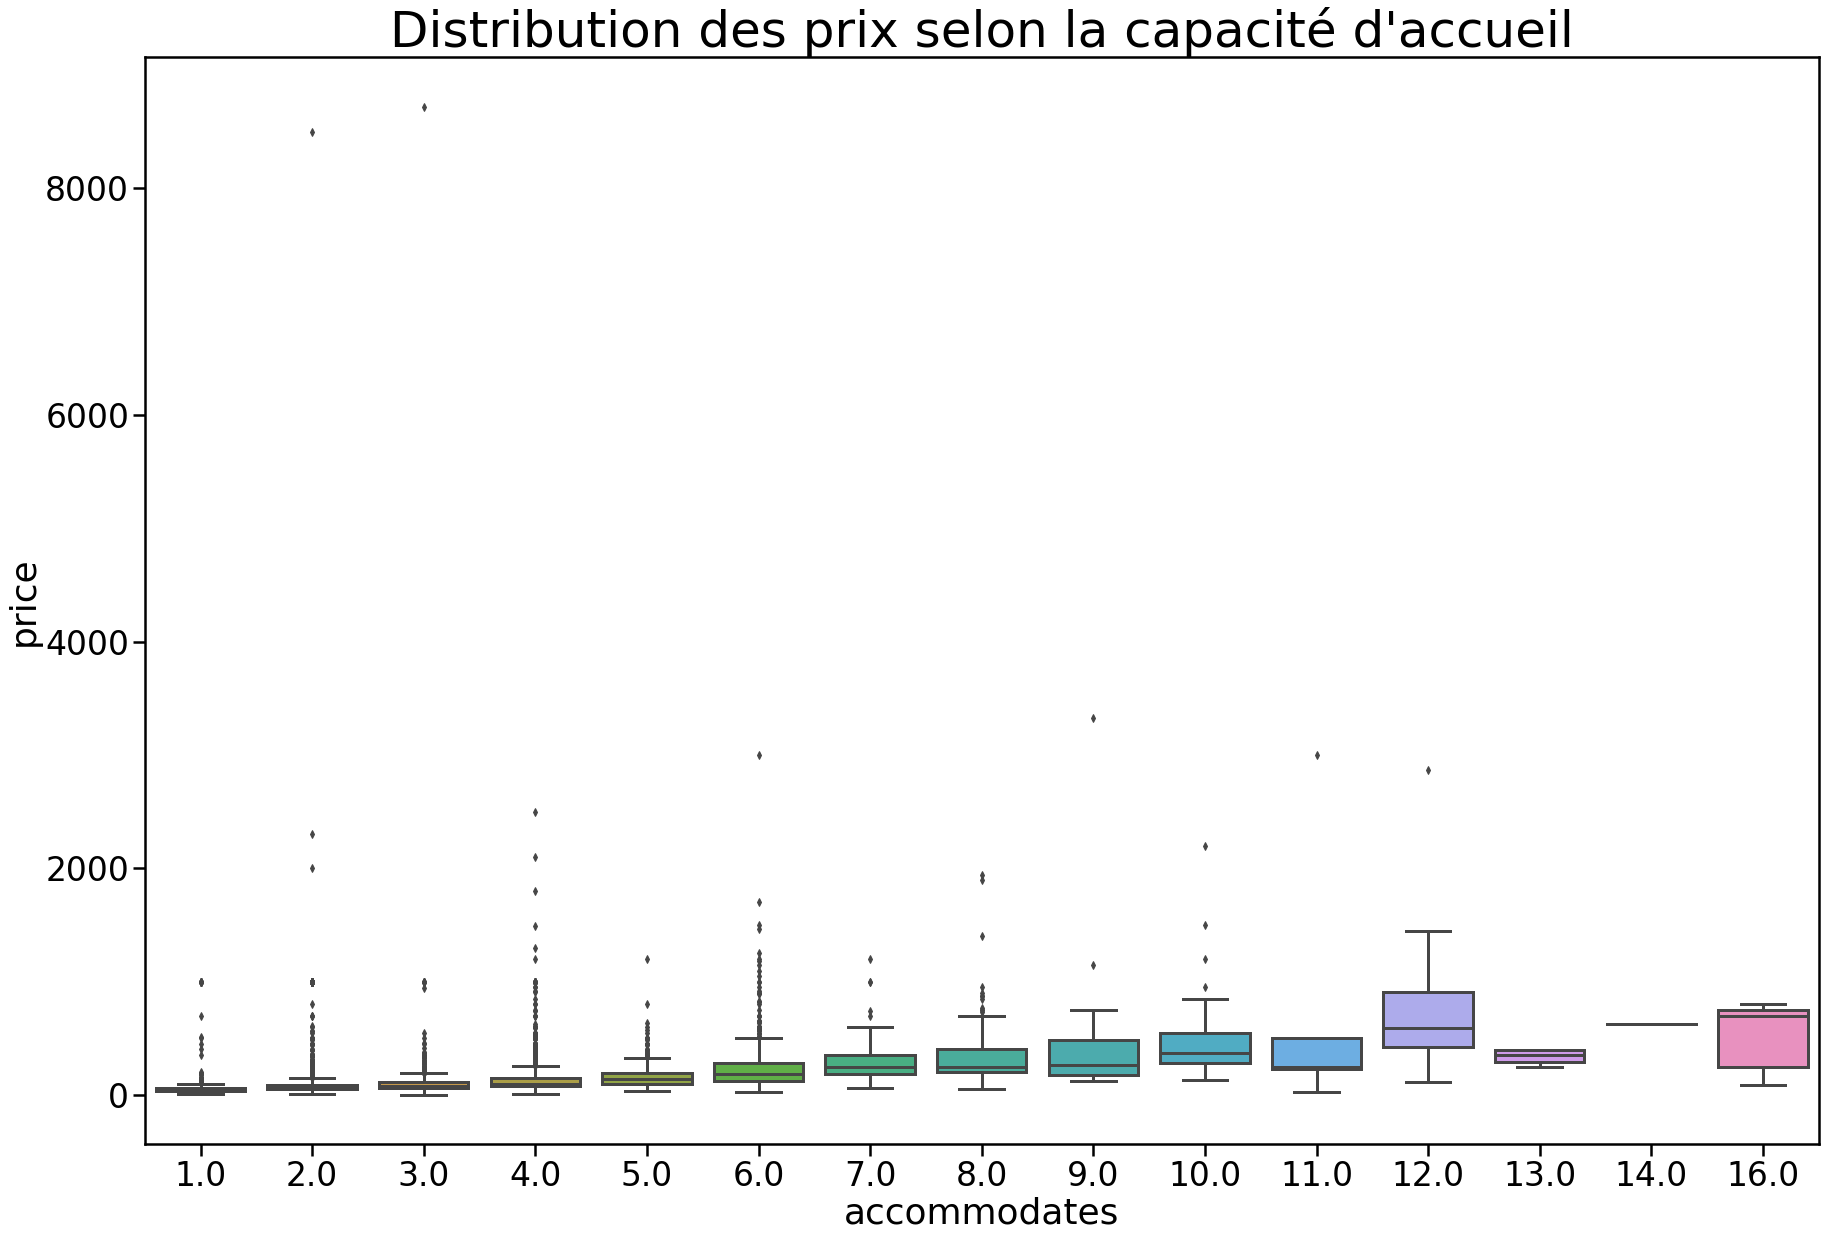

In [12]:
# Est-ce que les outliers correspondent à des offres pour une grande capacité d'accueil?

sns.set_context("poster", font_scale = 1.5)
plt.figure(figsize =(30, 20))
ax = sns.boxplot(x = 'accommodates', y = 'price', data = listings)
ax.set_title('Distribution des prix selon la capacité d\'accueil', fontsize=50)
plt.show()

In [13]:
#Regardons les offres à plus de 2000€:

newtarget_columns = ["price", "name", "accommodates", "square_feet", "summary", "space", "description", "listing_url", "experiences_offered", "neighborhood_overview", "notes","property_type", "first_review", "review_scores_value", "review_scores_cleanliness", "review_scores_location", "review_scores_accuracy", "review_scores_communication", "review_scores_checkin", "review_scores_rating", "maximum_nights", "host_is_superhost", "host_about", "weekly_price", "monthly_price"]
listingstop = listings[newtarget_columns]

listingstop[listingstop['price'] > 2000]

,price,name,accommodates,square_feet,summary,space,description,listing_url,experiences_offered,neighborhood_overview,...,review_scores_location,review_scores_accuracy,review_scores_communication,review_scores_checkin,review_scores_rating,maximum_nights,host_is_superhost,host_about,weekly_price,monthly_price
id,,,,,,,,,,,,,,,,,,,,,
5389821,4000,Cosy Flat - Pigalle - 2 Bedrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5814840,3000,Luxury 5 Bedrooms Champs Elysées,11.0,NaN,A Parisian might call this apartment a 'typic...,"Elegant, art, luxury, chic, glamour, large, co...",A Parisian might call this apartment a 'typic...,https://www.airbnb.com/rooms/5814840,none,"Between Champse Elysées, Place Victor Hugo and...",...,10.0,10.0,10.0,10.0,100.0,1125.0,f,Carpediem and serious,"$13,175.00","$39,000.00"
6088687,8500,Lovely Duplex 30m2 - Le Marais,2.0,NaN,The apartment is a charming studio organized i...,Hello! I entrust to you my charming duplex apa...,The apartment is a charming studio organized i...,https://www.airbnb.com/rooms/6088687,none,"Great neighbourhood, very central in the 3rd d...",...,10.0,10.0,10.0,10.0,97.0,28.0,f,NaN,$590.00,NaN
7225849,9379,"Artistic apartment, Montmartre",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8093890,8721,EIFFEL TOWER TROCADERO 2 BEDROOM,3.0,NaN,Wonderful parisian flat close (3 min walk) to ...,"The room is situated in a very nice Parisian ""...",Wonderful parisian flat close (3 min walk) to ...,https://www.airbnb.com/rooms/8093890,none,"Close to Trocadero, arc de Triomphe, the area ...",...,8.0,8.0,8.0,8.0,80.0,28.0,f,"Living in Paris, with my wife Anma.\r\nWe do l...",NaN,NaN
9442661,5000,Lively studette in 19th district,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18014073,2250,luxury flat victor hugo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19814324,2100,Modern & Colorful 2BR Duplex *City Center *Bal...,4.0,NaN,"Very modern appartement, pop art decoration!!!...",NaN,"Very modern appartement, pop art decoration!!!...",https://www.airbnb.com/rooms/19814324,none,"The creme de la creme of Parisian boulevards, ...",...,9.0,8.0,7.0,8.0,74.0,1125.0,f,We are Sweet Inn and we offer a unique hospita...,NaN,NaN
20047271,3000,"Appartement à Montmartre, calme et lumineux!",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#Quelle est la proportion d'offres à des prix "aberrants"?
#Filtre sur les prix >= 450€:

filter = listings['price'] >= 450 
highlistings = listings[filter]

len(highlistings)/len(listings)*100

2.2599660927317125

In [15]:
#Distribution des prix >= 450€:

highlistings.price.value_counts().head(20)

1000    326
500     153
450     105
600      62
550      48
700      45
800      34
499      29
750      27
650      26
490      23
1200     21
900      18
480      16
580      16
999      11
850      10
599       9
520       9
690       9
Name: price, dtype: int64

## Constitution d'un dataframe filtré


In [16]:
#Je choisis de filtrer le DataFrame pour garder uniqument les offres < 450€ pour l'analyse:

filter2 = listings['price'] < 450 
newlist = listings[filter2]


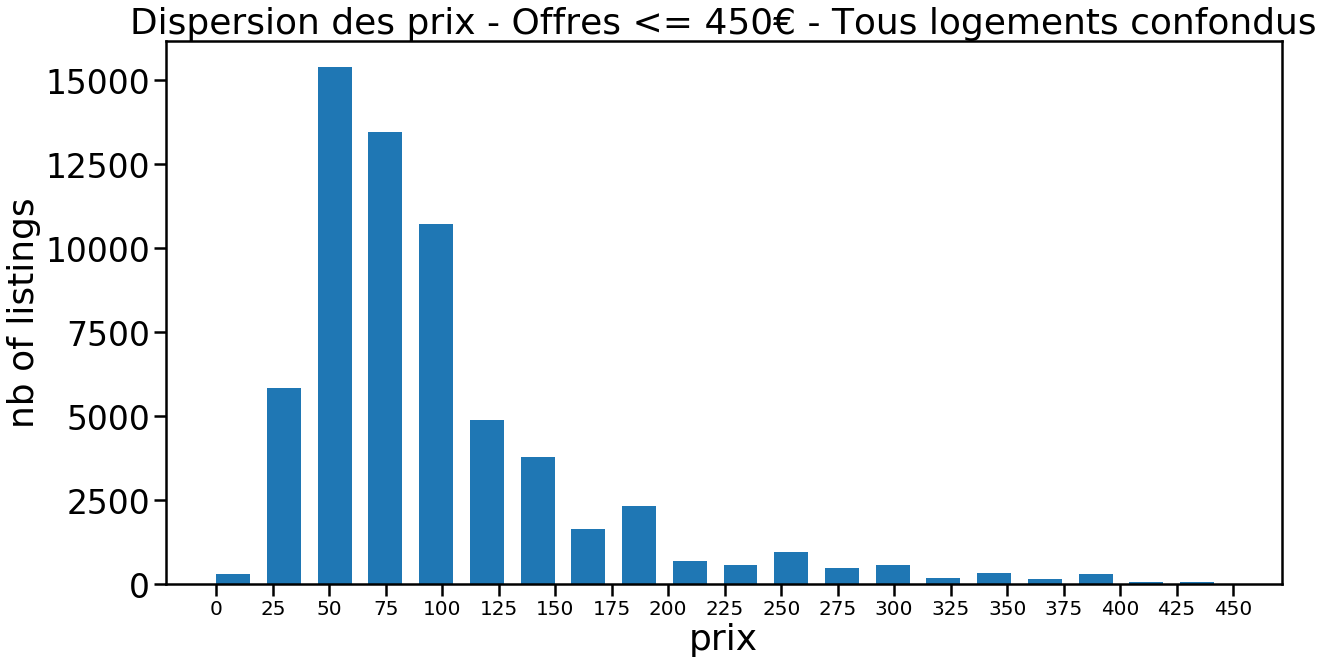

In [17]:
#Dispersion des prix

plt.figure(figsize =(20, 10))
plt.hist(newlist['price'], bins=20, width=15)
plt.title("Dispersion des prix - Offres <= 450€ - Tous logements confondus")
plt.xlabel('prix') 
plt.ylabel('nb of listings') 
plt.xticks(np.arange(0, 451, 25), fontsize=20) 
plt.show()

Text(0.5, 1.0, "Prix selon la capacité d'accueil - Offres <= 450€")

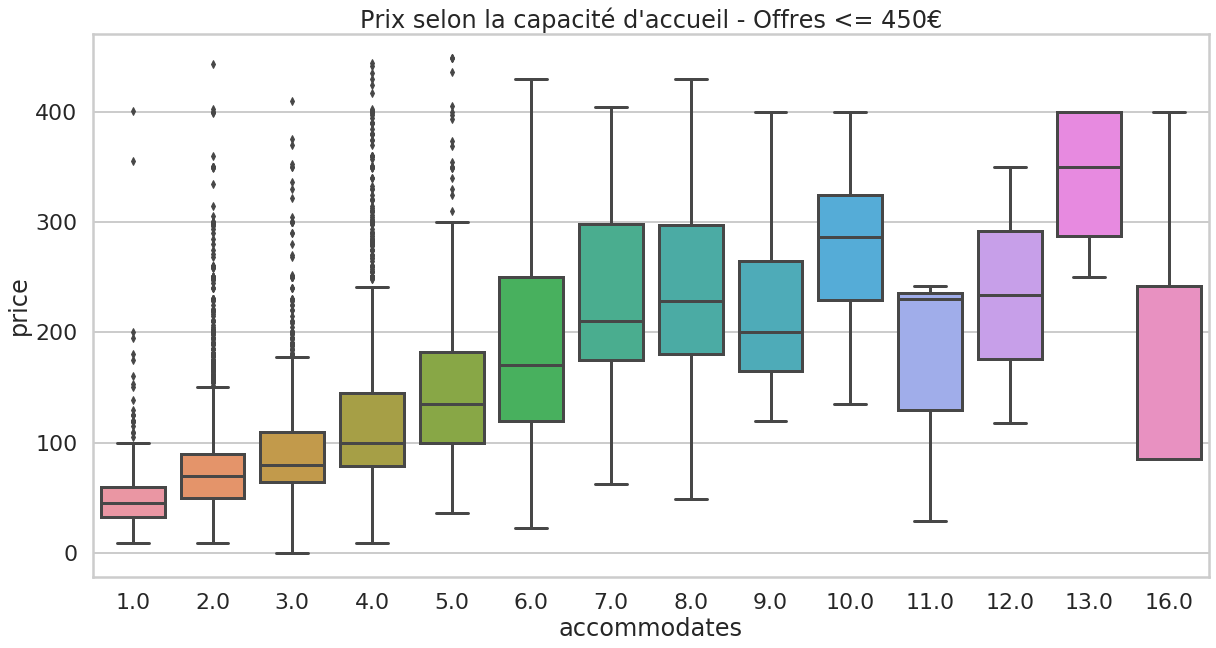

In [18]:
#Le prix dépend de la capacité d'accueil du logement:

sns.set_style("whitegrid") 
sns.set_context("poster", font_scale = 1)
plt.figure(figsize =(20, 10))
sns.boxplot(x = 'accommodates', y = 'price', data = newlist).set_title('Prix selon la capacité d\'accueil - Offres <= 450€')


#ou Matplotlib: newlist.boxplot(column='price',by='accommodates')

In [19]:
#Quelle est la capacité d'accueil la plus fréquente dans les offres?

n=newlist.accommodates.value_counts(sort=True)
n
#type(n)

2.0     6242
4.0     3130
3.0     1213
6.0      651
1.0      584
5.0      496
8.0      105
7.0       77
10.0      19
9.0       15
13.0       4
11.0       3
16.0       3
12.0       2
Name: accommodates, dtype: int64

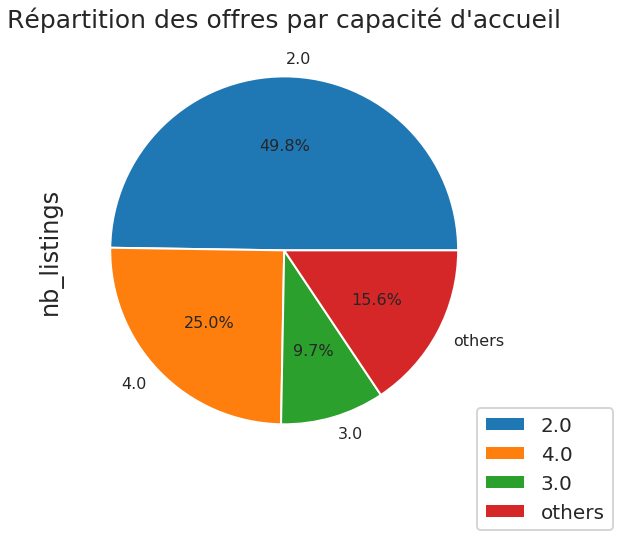

In [20]:
#Pour avoir un pie chart  avec les 3 modalités les + fréquentes et un poste "Autres":

#Constitution d'un DataFrame à partir de la series n
y = pd.DataFrame({'accomodates':n.index, 'nb_listings':n.values})

#sélection du top 3
y2 = y[:3]
y2

#constitution de "Autres"
new_row = pd.DataFrame(data = {
    'accomodates' : ['others'],
    'nb_listings' : [y['nb_listings'][3:].sum()]
})

#combining top 3 with others
y3 = pd.concat([y2, new_row])

#pie plot
#plt.figure(figsize=(20,10))
y3.plot(kind = 'pie', y = 'nb_listings', labels = y3['accomodates'], figsize=(8,8), fontsize=16, autopct='%1.1f%%')
plt.title("Répartition des offres par capacité d'accueil", fontsize=25)
plt.legend(y3['accomodates'], bbox_to_anchor=(1.1,0), loc="lower right", 
                          bbox_transform=plt.gcf().transFigure, fontsize=20)
plt.show()


## Analyse des prix moyen par quartier pour des logements pour 2 personnes vs notation donnée sur l'emplacement ( variable review_score_location)


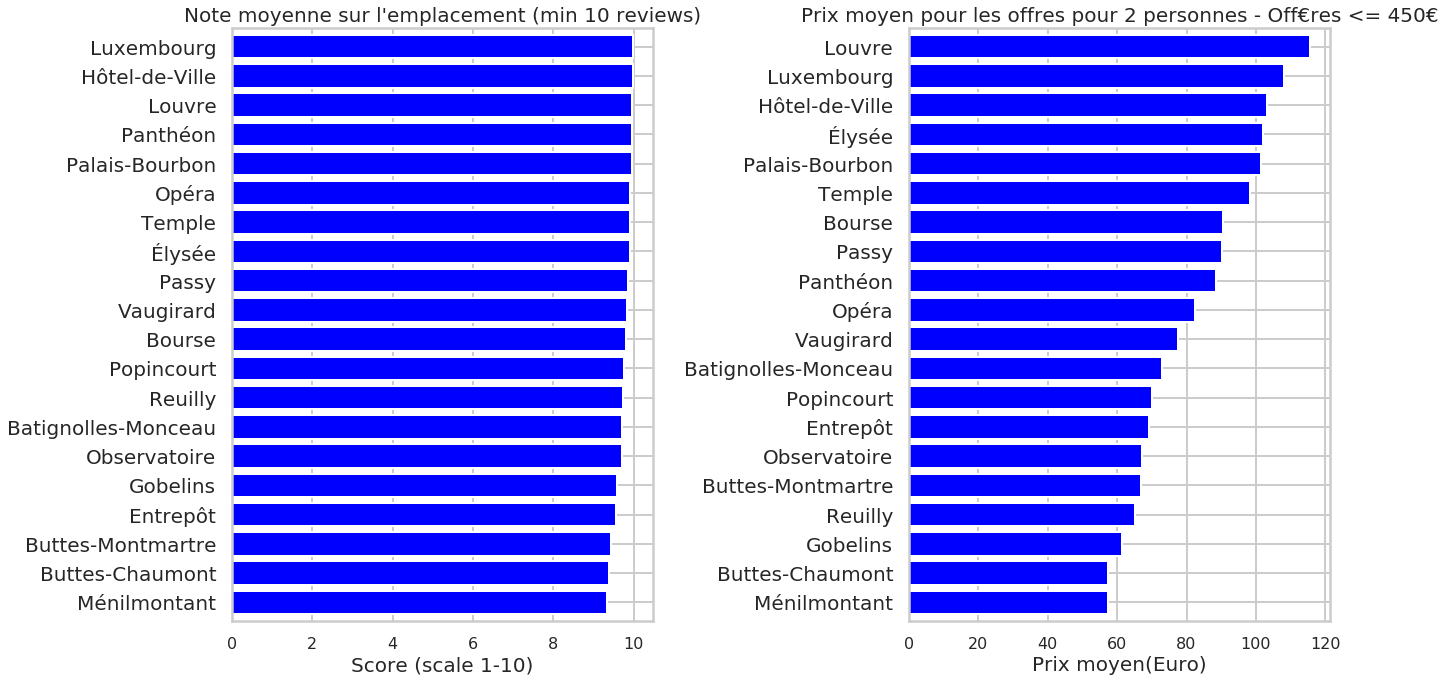

In [21]:
fig = plt.figure(figsize=(20,10))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=20)

ax1 = fig.add_subplot(121)
feq = newlist[newlist['number_of_reviews']>=10]
feq1 = feq.groupby('neighbourhood')['review_scores_location'].mean().sort_values(ascending=True)
ax1=feq1.plot.barh(color='b', width=0.8)
plt.title("Note moyenne sur l'emplacement (min 10 reviews)", fontsize=20)
plt.xlabel('Score (scale 1-10)', fontsize=20)
plt.ylabel("")

ax2 = fig.add_subplot(122)
feq = newlist[newlist['accommodates']==2]
feq2 = feq.groupby('neighbourhood')['price'].mean().sort_values(ascending=True)
ax2=feq2.plot.barh(color='b', width=0.8)
plt.title("Prix moyen pour les offres pour 2 personnes - Off€res <= 450€", fontsize=20)
plt.xlabel('Prix moyen(Euro)', fontsize=20)
plt.ylabel("")

plt.tight_layout()
plt.show()

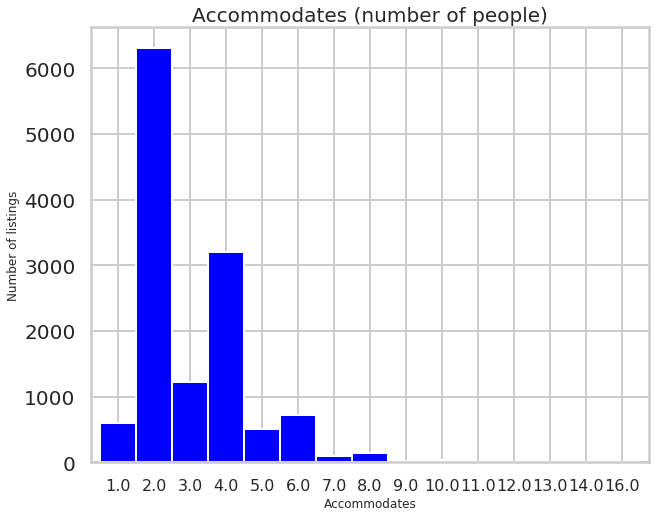

In [23]:
feq=listings['accommodates'].value_counts().sort_index()
feq.plot.bar(figsize=(10, 8), color='b', width=1, rot=0)
plt.title("Accommodates (number of people)", fontsize=20)
plt.ylabel('Number of listings', fontsize=12)
plt.xlabel('Accommodates', fontsize=12)
plt.show()

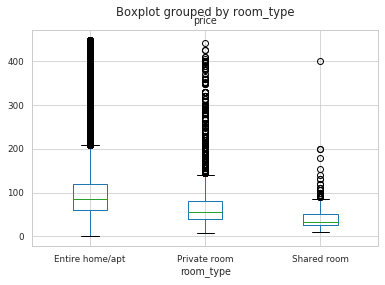

In [26]:
newlist.boxplot(column='price',by='room_type')